In [1]:
import statsmodels.formula.api as smf
#from pandas import DataFrame
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
 

In [2]:
y_t=[3083,3149,3218,3239,3295,3374,3475,3569,3597,3725,3794,3959,4043,4194,4318,4493,4683,4850,5005,5236]

In [3]:
x_t=[75,78,80,82,84,88,93,97,99,104,109,115,120,127,135,144,153,161,170,182]

In [4]:
d = {'Sales': y_t, 'Advertising': x_t}
data = pd.DataFrame(data=d)

In [5]:
data.head()

,Sales,Advertising
0,3083,75
1,3149,78
2,3218,80
3,3239,82
4,3295,84


# Primer supuesto

In [6]:
lm = smf.ols(formula="Sales~Advertising", data=data).fit()

In [7]:
lm

In [8]:
lm.params

Intercept      1608.507782
Advertising      20.090960
dtype: float64

El modelo predictivo sería:

Sales = 1608.507782 + 20.090960 * Advertising

In [9]:
data["Sales_pred"]= 1608.507782 + 20.090960 * data["Advertising"]

In [10]:
lm.pvalues

Intercept      1.002257e-25
Advertising    7.808055e-29
dtype: float64

In [11]:
lm.rsquared

0.9990916938619614

In [48]:
1/1-(0.999)

0.0010000000000000009

In [12]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.980e+04
Date:                Tue, 28 Sep 2021   Prob (F-statistic):           7.81e-29
Time:                        18:58:38   Log-Likelihood:                -87.765
No. Observations:                  20   AIC:                             179.5
Df Residuals:                      18   BIC:                             181.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1608.5078     17.022     94.494      0.000    1572.745    1644.270
Advertising    20.0910      0.143    140.709      0.000      19.791      20.391
==============================================================================
Omnibus:                        0.532   Durbin-Watson:                   1.080
Prob(Omnibus):                  0.766   Jarque-Bera (JB):                0.541
Skew:                           0.327   Prob(JB):                        0.763
Kurtosis:                       2.530   Cond. No.                         442.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

NameError: name 'sales_pred' is not defined

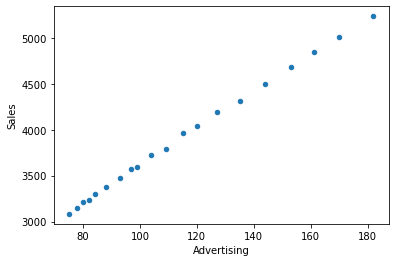

In [13]:
#make a graph with several instructions at the same time
%matplotlib inline
data.plot(kind="scatter", x= "Advertising", y="Sales")
plt.plot(pd.DataFrame(data["Advertising"]), sales_pred, c="red", linewidth=2)

In [14]:
# Los puntos predichos por el modelo se pueden obetener como:

#sales_pred = lm.predict(pd.DataFrame(data["Advertising"]))
#sales_pred

In [15]:
data["Least_square_residuals"] =(data["Sales"]-data["Sales_pred"]) # Residual Square Error 

In [16]:
data


,Sales,Advertising,Sales_pred,Least_square_residuals
0,3083,75,3115.329782,-32.329782
1,3149,78,3175.602662,-26.602662
2,3218,80,3215.784582,2.215418
3,3239,82,3255.966502,-16.966502
4,3295,84,3296.148422,-1.148422
5,3374,88,3376.512262,-2.512262
6,3475,93,3476.967062,-1.967062
7,3569,97,3557.330902,11.669098
8,3597,99,3597.512822,-0.512822
9,3725,104,3697.967622,27.032378


<AxesSubplot:xlabel='Sales_pred', ylabel='Least_square_residuals'>

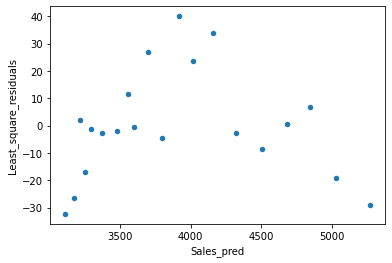

In [17]:
#make a graph with several instructions at the same time

data.plot(kind="scatter", x= "Sales_pred", y="Least_square_residuals")

## Cálculo de Durbin-Watson

In [18]:
# Cuadratic Residual Square Error 

In [19]:
data["e_t**2"] =(data["Sales"]-data["Sales_pred"])**2

In [20]:
data

,Sales,Advertising,Sales_pred,Least_square_residuals,e_t**2
0,3083,75,3115.329782,-32.329782,1045.214804
1,3149,78,3175.602662,-26.602662,707.701625
2,3218,80,3215.784582,2.215418,4.908077
3,3239,82,3255.966502,-16.966502,287.862190
4,3295,84,3296.148422,-1.148422,1.318873
5,3374,88,3376.512262,-2.512262,6.311460
6,3475,93,3476.967062,-1.967062,3.869333
7,3569,97,3557.330902,11.669098,136.167848
8,3597,99,3597.512822,-0.512822,0.262986
9,3725,104,3697.967622,27.032378,730.749460


In [21]:
data["Least_square_residuals"][1]

-26.602661999999782

In [41]:
type(data["Least_square_residuals"][0::]) 

pandas.core.series.Series

In [22]:
#La función zip () toma iterables (pueden ser cero o más), los agrega en una tupla y los devuelve. 
diff_list = []
for x, y in zip(data["Least_square_residuals"][0::], data["Least_square_residuals"][1::]):
    diff_list.append(y-x)
    diff_list=diff_list
    

In [28]:
new_diff_list=[]
for elemen in diff_list:
    x= elemen**2
    new_diff_list.append(x)
    
    

In [30]:
new_diff_list.insert(0,0)

In [31]:
new_diff_list

[0,
 32.799903494400155,
 830.4817348864005,
 367.9460548863997,
 250.21165488640028,
 1.8600595455999507,
 0.2972430400000246,
 185.94485954560048,
 148.39917488639978,
 758.7380430399762,
 989.4044430399699,
 1976.1794539776024,
 270.7604430400142,
 107.39757235841007,
 1348.9224781823973,
 33.85657144960482,
 84.2973714496091,
 39.34199818240045,
 666.6021714496214,
 101.83877591039891]

In [33]:
data["(e_t-e_(t-1))**2"] =new_diff_list

In [34]:
data

,Sales,Advertising,Sales_pred,Least_square_residuals,e_t**2,(e_t-e_(t-1))**2
0,3083,75,3115.329782,-32.329782,1045.214804,0.000000
1,3149,78,3175.602662,-26.602662,707.701625,32.799903
2,3218,80,3215.784582,2.215418,4.908077,830.481735
3,3239,82,3255.966502,-16.966502,287.862190,367.946055
4,3295,84,3296.148422,-1.148422,1.318873,250.211655
5,3374,88,3376.512262,-2.512262,6.311460,1.860060
6,3475,93,3476.967062,-1.967062,3.869333,0.297243
7,3569,97,3557.330902,11.669098,136.167848,185.944860
8,3597,99,3597.512822,-0.512822,0.262986,148.399175
9,3725,104,3697.967622,27.032378,730.749460,758.738043


### Cálculo de d de Durbin-Watson

In [35]:
d=sum(data["(e_t-e_(t-1))**2"]) / sum(data["e_t**2"])

In [36]:
d

1.0800498118770527

(array([3., 1., 1., 2., 7., 1., 1., 1., 1., 2.]),
 array([-32.329782, -25.093622, -17.857462, -10.621302,  -3.385142,
          3.851018,  11.087178,  18.323338,  25.559498,  32.795658,
         40.031818]),
 <BarContainer object of 10 artists>)

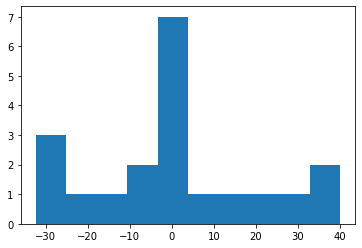

In [44]:
plt.hist((data["Sales"]-data["Sales_pred"])) #Errors are distributed according to a normal distribution with zero mean 